<a href="https://colab.research.google.com/github/sengupta-arijit-rij/Machine-Learning/blob/WorkingBranch/Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pixeltests Data Science

*Unit 1, Sprint 1, Module 2*

---

# Learning Objectives

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function

- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations - eg. .strip(), .split(), .replace() and list comprehensions
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series - lots more details about time using and not using Pandas
- [Pixeltests Learning Method for DS - By Jayanth Rasamsetti](https://drive.google.com/file/d/1FOzTz7YtutH7M4WfS4bta-xkSqwG48Wn/view?usp=sharing)

#Pandas is not "Pythonic". 

What does Pythonic mean???

???

## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity, and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [ ]:
#Import pandas
import pandas as pd

# Pandas Display Options:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

### Let's explore feature engineering with the Ames Housing data.  Import the dataset and name it "house".

###1) Import the Ames Housing Data:

In [ ]:
# url_to_data = 'https://raw.githubusercontent.com/pixeltests/datasets/main/aimes_housing.csv'
house = pd.read_csv('https://raw.githubusercontent.com/pixeltests/datasets/main/aimes_housing.csv')
# house_df = pd.read_csv(url_to_data)

###2) Let's explore some features of the dataset:

In [ ]:
#Print out the first five observations
house.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,...,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,...,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,...,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,...,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,...,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,...,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,...,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,...,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,...,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,...,1,2008,WD,Normal,118000


In [ ]:
#Print out the last five observations
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,...,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,...,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,...,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,...,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,...,6,2008,WD,Normal,147500


In [ ]:
#Get info on each variable
house.info()

In [ ]:
#What if I just want the data type?
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
#How much missing data is there in each variable?
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
house.shape

(1460, 81)

In [ ]:
#How many missing observations are there in the entire dataset?
house.isnull().sum().sum()

6965

In [ ]:
#How could we access descriptive statistics for the numeric variables?
house.describe() #Will give only numercis
house.describe(include='all') #Will give everything
house.describe(include='number') #Will give only numerical
house.describe(exclude='number') #Will give only categorical

#OR #house.describe(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,...,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,...,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,...,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,...,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,...,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,...,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,...,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#How could we access descriptive statistics for the categorical variables?
house.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Let's look a little more closely at `BedroomAbvGr`

`BedroomAbvGr` which stands for "Bedrooms Above Ground." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/pixeltests/datasets/blob/main/ames_data_description.txt).

In [ ]:
# Look at a few rows of the `BedroomAbvGr` column.
# What is the data type?
house['BedroomAbvGr'].head()

0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

What type of variable is BedroomAbvGr?  Is it categorical or quantitative?  etc.

?????

Now lets take a closer look at `LotFrontage`.

In [ ]:
# Look at a few rows of the `LotFrontage` column.
house['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [ ]:
# Possible values of lot frontage
house['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: Does every house have a lot frontage?

In [ ]:
house['LotFrontage'].nunique()

110

In [ ]:
house['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes sense to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember - Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [ ]:
#import numpy
import numpy as np
# What is the datatype of NaN?
type(np.nan)

float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

# [Objective 01](#feature-engineering) - Feature Engineering



### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# get a single column

subset = house[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()


In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [ ]:
# Get more than one column, then pass in a list of column headers

In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

#In the following example we are copying a set to another set using = operator. 
#The problem with this method is that if any of the set (old or new) is modified, 
#the changes will reflect in both the sets. If you do not want this kind of behavior 
#and only want the set where you are making changes to be changed then use copy() method

subset['TotalSquareFootage'] = 1


In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,1
1,1262,1262,0,181500,1
2,920,920,866,223500,1
3,756,961,756,140000,1
4,1145,1145,1053,250000,1


This is the best tutorial I've seen about the difference between assignment, a shallow copy and a deep copy: https://medium.com/better-programming/assignment-vs-shallow-copy-vs-deep-copy-in-python-246ea4d36b3c

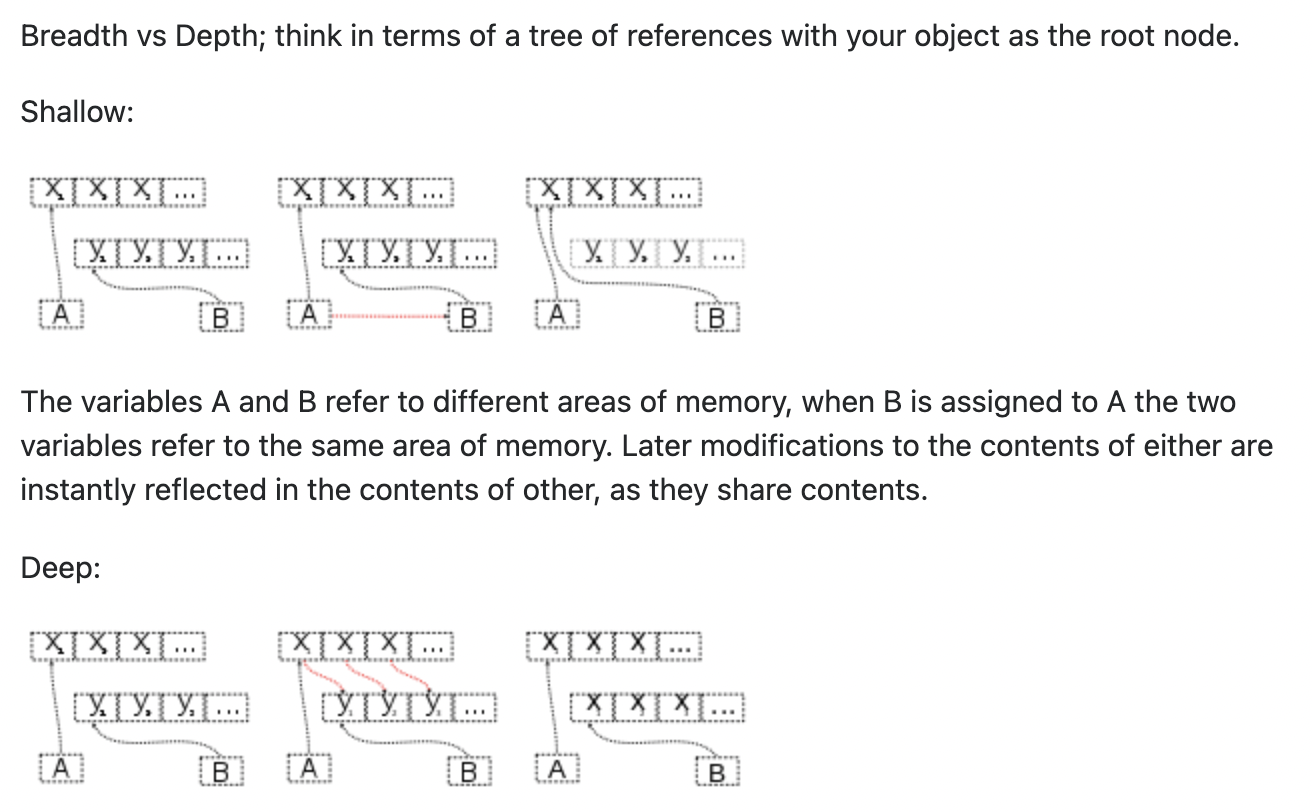


In [ ]:
#Look at the data types

### Creating a new column by doing arithmetic on other columns

In [ ]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
subset['TotalSquareFootage'] = subset['TotalBsmtSF'] + subset['1stFlrSF'] + subset['2ndFlrSF']

In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [ ]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
subset['PricePerSqFt'] = subset['SalePrice'] / subset['TotalSquareFootage']

In [ ]:
srs = subset['PricePerSqFt']

In [ ]:
srs = srs.copy()

In [ ]:
srs.head()

0    81.254871
1    71.909667
2    82.594235
3    56.611403
4    74.783129
Name: PricePerSqFt, dtype: float64

In [ ]:
srs.iloc[3]

56.61140315406389

In [ ]:
srs.iloc[3] = 5

In [ ]:
srs.head()

0    81.254871
1    71.909667
2    82.594235
3     5.000000
4    74.783129
Name: PricePerSqFt, dtype: float64

In [ ]:
type(srs)

pandas.core.series.Series

In [ ]:
subset['PricePerSqFt'].head()

0    81.254871
1    71.909667
2    82.594235
3    56.611403
4    74.783129
Name: PricePerSqFt, dtype: float64

###Why might you want to have the total square footage or price per square foot variables?

?????

###We can also use if-then statements to create new variables.  

Say we want to categorize houses as having a high price per square foot (greater than or equal to 80 dollars per square foot) or a low price per square foot (less than 80 dollars per square foot).

In [ ]:
#The format is DF.loc[DF['COLUMN'] logical expression, 'NEW VARIABLE NAME' ] assignment

subset.loc[subset['PricePerSqFt'] >= 80, 'High_priced'] = 1
subset.loc[subset['PricePerSqFt'] < 80, 'High_priced'] = 0
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced
0,856,856,854,208500,2566,81.254871,1.0
1,1262,1262,0,181500,2524,71.909667,0.0
2,920,920,866,223500,2706,82.594235,1.0
3,756,961,756,140000,2473,56.611403,0.0
4,1145,1145,1053,250000,3343,74.783129,0.0


Why might we want to have categories for high and low cost per square foot?



?????

### Let's include "and" and "or" conditions in the if-then statements.

We can identify high price per square foot houses with basements.

In [ ]:
subset.loc[(subset['PricePerSqFt']>= 80) & (subset['TotalBsmtSF']>0), 'High_price_with_basement' ] = 1

In [ ]:
subset.loc[(subset["PricePerSqFt"]<50)&(subset['TotalBsmtSF']>0),"Low_price_wth_basement"]=1

In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced,High_price_with_basement,Low_price_wth_basement
0,856,856,854,208500,2566,81.254871,1.0,1.0,NaN
1,1262,1262,0,181500,2524,71.909667,0.0,NaN,NaN
2,920,920,866,223500,2706,82.594235,1.0,1.0,NaN
3,756,961,756,140000,2473,56.611403,0.0,NaN,NaN
4,1145,1145,1053,250000,3343,74.783129,0.0,NaN,NaN


In [ ]:
subset['High_price_with_basement'] = subset['High_price_with_basement'].fillna(0)

In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced,High_price_with_basement
0,856,856,854,208500,2566,81.254871,1.0,1.0
1,1262,1262,0,181500,2524,71.909667,0.0,0.0
2,920,920,866,223500,2706,82.594235,1.0,1.0
3,756,961,756,140000,2473,56.611403,0.0,0.0
4,1145,1145,1053,250000,3343,74.783129,0.0,0.0


In [ ]:
#No missing data so we can assume if basement sqft = 0 then there is no basement.

## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective 02](#work-with-strings) - Work with Strings with Pandas

# [Objective 03](#pandas-apply) - Modify and Create Columns using `.apply()`



## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.



In [ ]:
# Read in the CSV
import pandas as pd

loans_data = 'https://bit.ly/3u2BwIs'
loans = pd.read_csv(loans_data)

print(loans.shape)
loans.head()

(30000, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5525,5525,5525.0,...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.0,...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000,20000,20000.0,...,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000,12000,12000.0,...,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # We can also fix the header problem by using the 'skiprows' parameter

# loans = pd.read_csv(loans_data, skiprows=1)

# loans.head()

In [ ]:
# loans_ = pd.read_csv(loans_data, skiprows=1)

# print(loans_.shape)
# loans_.head()

# loans = loans_[0:128412]
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
29995,NaN,NaN,20000,20000,20000.0,...,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,35000,35000,35000.0,...,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,10000,10000,9975.0,...,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,16000,16000,16000.0,...,NaN,NaN,NaN,NaN,NaN
29999,NaN,NaN,6400,6400,6400.0,...,NaN,NaN,NaN,NaN,NaN


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 33.0+ MB


In [ ]:
loans.shape

(30000, 144)

In [ ]:
# Skip the footer as well.

A quick note about missing data...  Why might there be so much missing data for membrID, etc.

In [ ]:
#check for missing data in loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 33.0+ MB


In [ ]:
#drop columns where everything is missing
missing_columns = ["id",	"member_id"] # Only listing two, you could do all of them or as many


In [ ]:
loans_cleaned_of_missing_values = loans.drop(missing_columns, axis=1)
loans_cleaned_of_missing_values.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5525,5525,5525.0,36 months,10.72%,...,NaN,NaN,NaN,NaN,NaN
1,10000,10000,10000.0,36 months,10.08%,...,NaN,NaN,NaN,NaN,NaN
2,12000,12000,12000.0,60 months,10.08%,...,NaN,NaN,NaN,NaN,NaN
3,20000,20000,20000.0,36 months,6.46%,...,NaN,NaN,NaN,NaN,NaN
4,12000,12000,12000.0,36 months,7.02%,...,NaN,NaN,NaN,NaN,NaN


In [ ]:
#did it work?

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column:

In [ ]:
# Look at the first 10 values of the int_rate column
loans['int_rate'].head(10)

0     10.72%
1     10.08%
2     10.08%
3      6.46%
4      7.02%
5     27.27%
6     13.56%
7     10.33%
8     11.31%
9     15.02%
Name: int_rate, dtype: object

In [ ]:
# We can use .str.strip to remove both the leading space and the % sign and cast the value to a float rather than a string.
loans = loans.copy()

In [ ]:
loans['int_rate'] = loans['int_rate'].str.strip('%')

In [ ]:
loans['int_rate'].head(10)

0     10.72
1     10.08
2     10.08
3      6.46
4      7.02
5     27.27
6     13.56
7     10.33
8     11.31
9     15.02
Name: int_rate, dtype: object

In [ ]:
#Remove the white space
loans['int_rate'] = loans['int_rate'].str.strip()
loans['int_rate'].head()

0    10.72
1    10.08
2    10.08
3     6.46
4     7.02
Name: int_rate, dtype: object

In [ ]:
#Remove both by using both functions

In [ ]:
#Finally, we need to cast our value to a float so we can do calculations on it
# loans['int_rate'] = loans['int_rate'].astype(float)
loans['int_rate'] = loans['int_rate'].astype(float)

In [ ]:
loans['int_rate'].head()

0    10.72
1    10.08
2    10.08
3     6.46
4     7.02
Name: int_rate, dtype: float64

#Let's talk about another way to approach this problem by building a function and using .apply()

In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
example_int_rate = ' 14.47%'
# example_int_rate2 = ' 3.14%'

In [ ]:
#Doesn't work to try to apply the .strip function to an entire column all at once (without the .str).
#The function has to be applied to a text string.
float(example_int_rate.strip().strip('%'))

14.47

In [ ]:
#You can "chain" two strip functions to remove both the spaces and the % sign

In [ ]:
# "Cast" the string value to a float
# "cast" -> Change something's data type
# This is the line of code that we're after! ->

### Write a function to make our solution reusable!

In [ ]:
#Review what we're working with one more time
def clean_data(x):
  return str(x).strip().strip('%')
clean_data(example_int_rate)

'14.47'

In [ ]:
loans['int_rate']
loans = loans.copy()

In [ ]:
loans['int_rate'].head()

0    10.72
1    10.08
2    10.08
3     6.46
4     7.02
Name: int_rate, dtype: float64

In [ ]:
loans['int_rate_cleaned_function'] = loans['int_rate'].apply(clean_data)

In [ ]:
loans['int_rate_cleaned_function']

0        10.72
1        10.08
2        10.08
3         6.46
4         7.02
         ...  
29995    10.33
29996     6.11
29997    25.34
29998     7.84
29999    13.56
Name: int_rate_cleaned_function, Length: 30000, dtype: object

We want to write a function that will look in every cell of int_rate, take out the white space and the % and convert the result into a float.

Every function has several standard parts:

* def statement
* name
* parameter name(s)
* body
* a return statement
* a return value

Here's an example of a function that the raduius of a sphere and calculates the volume.

It would be a pain to have to write this code over and over again if we needed to do this calculation a lot, so it's nice to have it written as a re-usable function. 

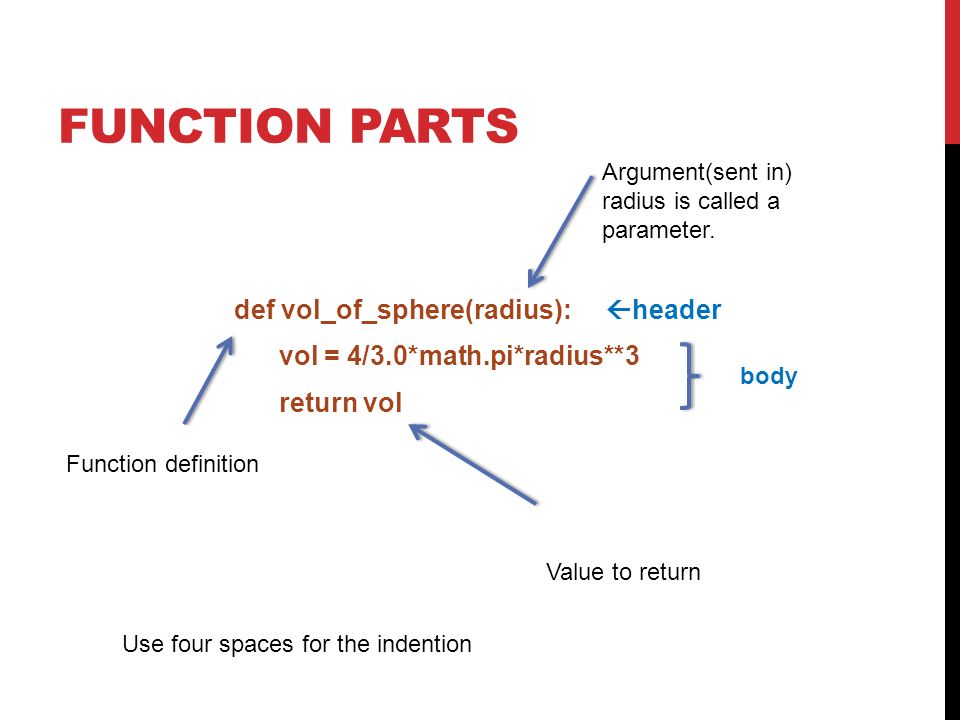

In [ ]:
# Here is a function that will take a single string, strip off the space and %
# And return the value as a float

def int_rate_to_float(string):
  return float(string.strip().strip('%'))

* def = _____________
* return = ____________
* int_rate_to_float = ________________
* string = _______________
* float(string.strip().strip('%')) = __________________



In [ ]:
# Test out our function by calling it on int_rate, the string we created earlier.

In [ ]:
# is the data type correct?

The the problem is that - to use this function - we'd have to feed in every interest rate one by one.  Not pracitcal.  

Fortunately we can use the .apply() function built to into Python, which will apply the function to every row of a variable.

### Apply to every row using .apply

In [ ]:
#Apply to every row

In [ ]:
# pass in *only* the name of the function, don't call it. 
# This works because we know the function works on every item in the column
# so I can simply "apply" it to the entire column